In this course, we have learned the importance of data visualization and how to leverage packages in the Tidyverse for data visualization in R. This project will give you the opportunity to practice those skills in greater depth. 

The overall goal is to explore the nutrition of entree items and the sales of fast food restaurants in 2018. Your task is to reconstruct the a set of plots, all of which were constructed using packages in the Tidyverse or packages that integrate with the Tidyverse. 

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime
from datetime import datetime, timedelta
import scipy.stats
import pandas_profiling
from pandas_profiling import ProfileReport


%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

# Use Folium library to plot values on a map.
#import folium

#import feature_engine.missing_data_imputers as mdi
#from feature_engine.outlier_removers import Winsorizer
#from feature_engine import categorical_encoders as ce

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.option_context('float_format','{:.2f}'.format)

np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


In [2]:
df_fastfood = pd.read_csv("data_fastfood_sales.csv")

In [3]:
df_fastfood

,restaurant,average_sales,us_sales,num_company_stores,num_franchised_stores,unit_count
0,Subway,416.86,10800.00,0,25908,25908
1,Mcdonalds,2670.32,37480.67,842,13194,14036
2,Starbucks,945.27,13167.61,8222,5708,13930
3,Dunkin Donuts,733.13,9192.00,0,12538,12538
4,Pizza Hut,900.00,5510.84,96,7426,7522
5,Burger King,1387.81,10028.32,50,7196,7266
6,Taco Bell,1500.00,9790.15,647,5799,6446
7,Wendys,1610.00,9288.09,337,5432,5759
8,Dominos,1000.00,5900.00,392,5195,5587
9,Little Caesars,815.00,3530.58,535,3797,4332


## Exploratory Data Analysis

In [4]:
df_fastfood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   restaurant             19 non-null     object 
 1   average_sales          19 non-null     float64
 2   us_sales               19 non-null     float64
 3   num_company_stores     19 non-null     int64  
 4   num_franchised_stores  19 non-null     int64  
 5   unit_count             19 non-null     int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 1.0+ KB


In [5]:
df_fastfood.describe()

,average_sales,us_sales,num_company_stores,num_franchised_stores,unit_count
count,19.000000,19.000000,19.000000,19.000000,19.000000
mean,1189.880000,7592.685789,839.000000,5998.526316,6838.052632
std,541.522319,8007.316428,1875.795713,5894.507390,5997.132653
min,360.720000,606.000000,0.000000,0.000000,2231.000000
25%,857.500000,3499.875000,53.500000,2583.000000,3034.500000
50%,1130.000000,4476.410000,276.000000,4055.000000,4332.000000
75%,1470.095000,9539.120000,677.500000,6497.500000,7394.000000
max,2670.320000,37480.670000,8222.000000,25908.000000,25908.000000


In [6]:
df_fastfood.columns

Index(['restaurant', 'average_sales', 'us_sales', 'num_company_stores', 'num_franchised_stores', 'unit_count'], dtype='object')

## Data Visualization

### Problem 1

In [7]:
df_fastfood["log_sales"] = np.log10(df_fastfood["us_sales"])

In [8]:
df_fastfood["log_stores"] = np.log10(df_fastfood["unit_count"])

In [9]:
df_fastfood

,restaurant,average_sales,us_sales,num_company_stores,num_franchised_stores,unit_count,log_sales,log_stores
0,Subway,416.86,10800.00,0,25908,25908,4.033424,4.413434
1,Mcdonalds,2670.32,37480.67,842,13194,14036,4.573807,4.147243
2,Starbucks,945.27,13167.61,8222,5708,13930,4.119507,4.143951
3,Dunkin Donuts,733.13,9192.00,0,12538,12538,3.963410,4.098228
4,Pizza Hut,900.00,5510.84,96,7426,7522,3.741218,3.876333
5,Burger King,1387.81,10028.32,50,7196,7266,4.001228,3.861295
6,Taco Bell,1500.00,9790.15,647,5799,6446,3.990789,3.809290
7,Wendys,1610.00,9288.09,337,5432,5759,3.967926,3.760347
8,Dominos,1000.00,5900.00,392,5195,5587,3.770852,3.747179
9,Little Caesars,815.00,3530.58,535,3797,4332,3.547846,3.636688


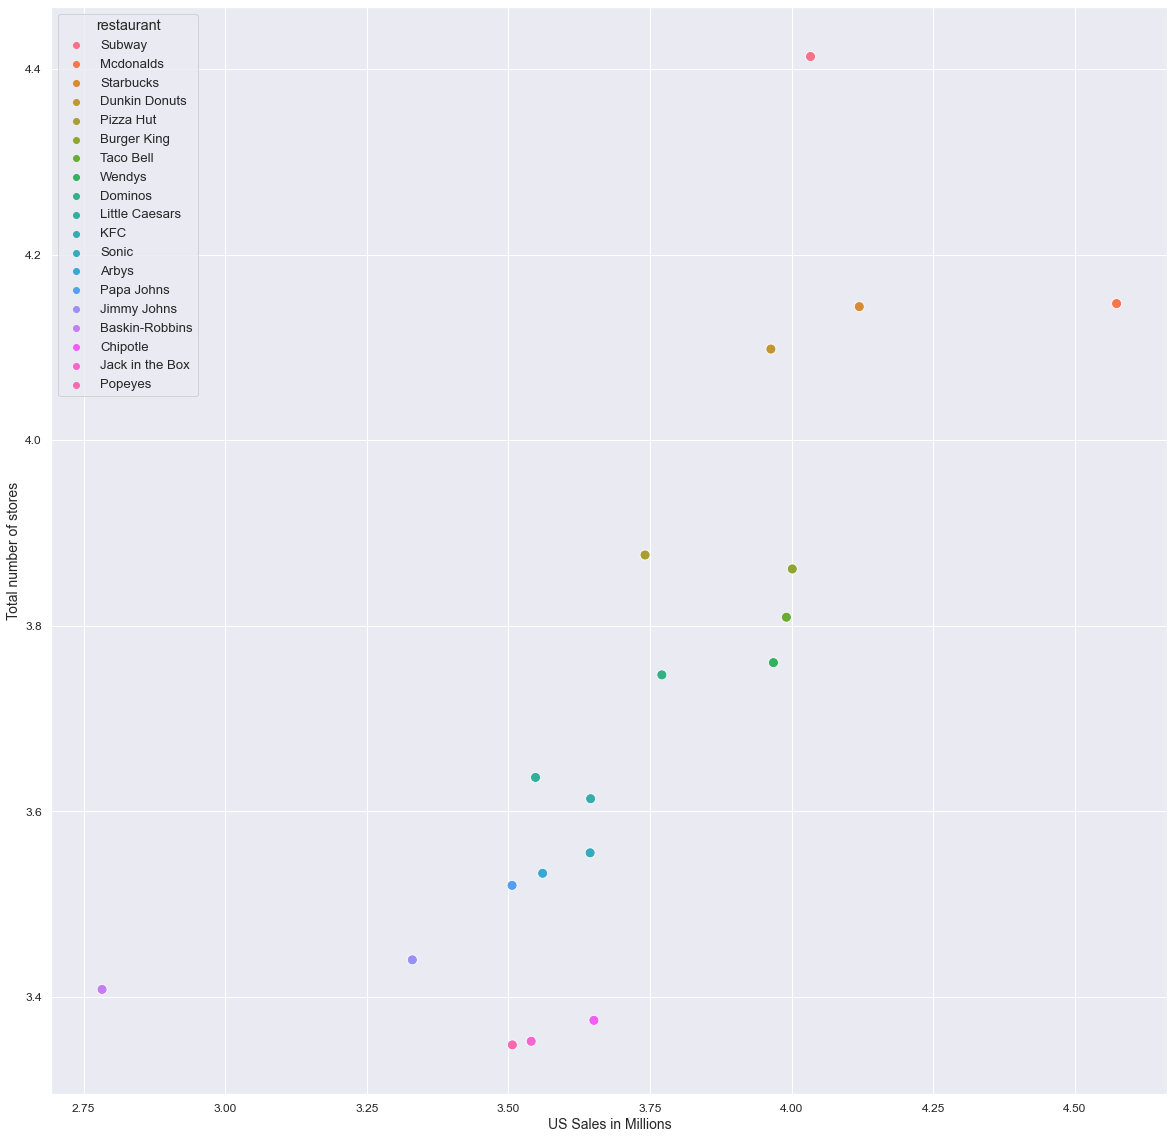

In [10]:
plt.figure(figsize=(20,20))
sns.scatterplot(x="log_sales", y="log_stores", data=df_fastfood, hue="restaurant", ci=None, s=100)
plt.xlabel("US Sales in Millions")
plt.ylabel("Total number of stores")
plt.show()

### Problem 2

In [11]:
df_sales = pd.read_csv("data_fastfood_sales.csv")

In [12]:
df_sales

,restaurant,average_sales,us_sales,num_company_stores,num_franchised_stores,unit_count
0,Subway,416.86,10800.00,0,25908,25908
1,Mcdonalds,2670.32,37480.67,842,13194,14036
2,Starbucks,945.27,13167.61,8222,5708,13930
3,Dunkin Donuts,733.13,9192.00,0,12538,12538
4,Pizza Hut,900.00,5510.84,96,7426,7522
5,Burger King,1387.81,10028.32,50,7196,7266
6,Taco Bell,1500.00,9790.15,647,5799,6446
7,Wendys,1610.00,9288.09,337,5432,5759
8,Dominos,1000.00,5900.00,392,5195,5587
9,Little Caesars,815.00,3530.58,535,3797,4332


In [13]:
df2 = df_sales.sort_values(by="average_sales", ascending=False)
df2

,restaurant,average_sales,us_sales,num_company_stores,num_franchised_stores,unit_count
1,Mcdonalds,2670.32,37480.67,842,13194,14036
16,Chipotle,1940.00,4476.41,2371,0,2371
7,Wendys,1610.00,9288.09,337,5432,5759
17,Jack in the Box,1543.00,3469.17,276,1975,2251
6,Taco Bell,1500.00,9790.15,647,5799,6446
18,Popeyes,1440.19,3213.06,53,2178,2231
5,Burger King,1387.81,10028.32,50,7196,7266
11,Sonic,1250.00,4408.16,228,3365,3593
10,KFC,1200.00,4417.05,54,4055,4109
12,Arbys,1130.00,3634.00,1075,2340,3415


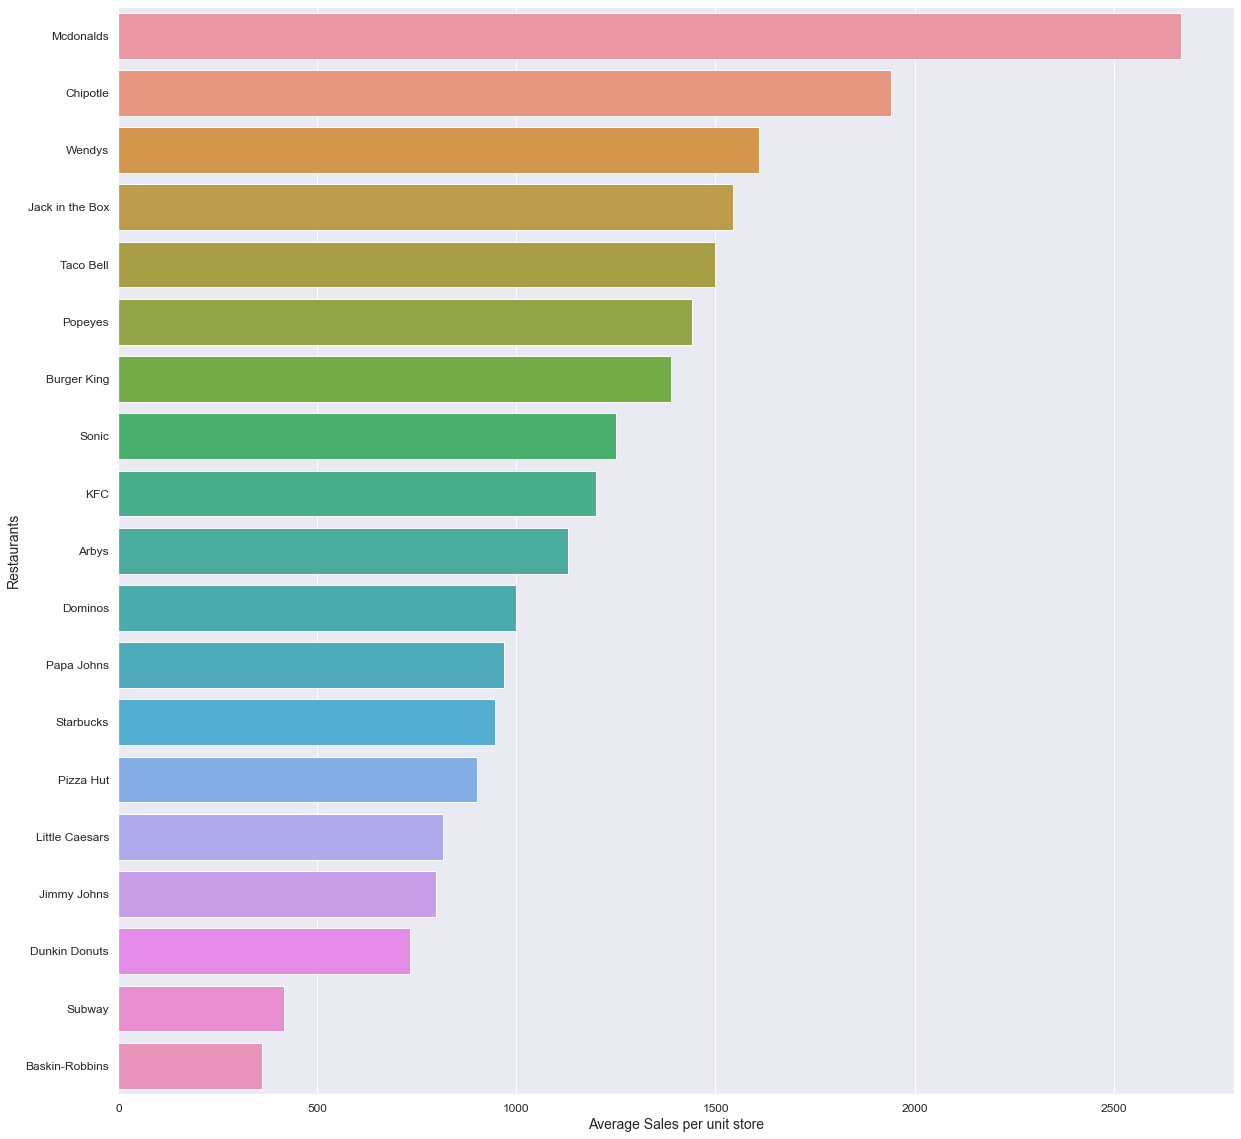

In [14]:
plt.figure(figsize=(20,20))
sns.barplot(x="average_sales", y="restaurant", data=df2, ci=None)
plt.xlabel("Average Sales per unit store")
plt.ylabel("Restaurants")
plt.show()

### Problem 3

In [15]:
df_calories = pd.read_csv("data_fastfood_calories.csv")

In [16]:
df_calories

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,Taco Bell,Spicy Triple Double Crunchwrap,780,340,38,10.0,0.5,50,1850,87,9.0,8,23.0,20.0,10.0,25.0
511,Taco Bell,Express Taco Salad w/ Chips,580,260,29,9.0,1.0,60,1270,59,8.0,7,23.0,NaN,NaN,NaN
512,Taco Bell,Fiesta Taco Salad-Beef,780,380,42,10.0,1.0,60,1340,74,11.0,7,26.0,NaN,NaN,NaN
513,Taco Bell,Fiesta Taco Salad-Chicken,720,320,35,7.0,0.0,70,1260,70,8.0,8,32.0,NaN,NaN,NaN


<Figure size 2880x1440 with 0 Axes>

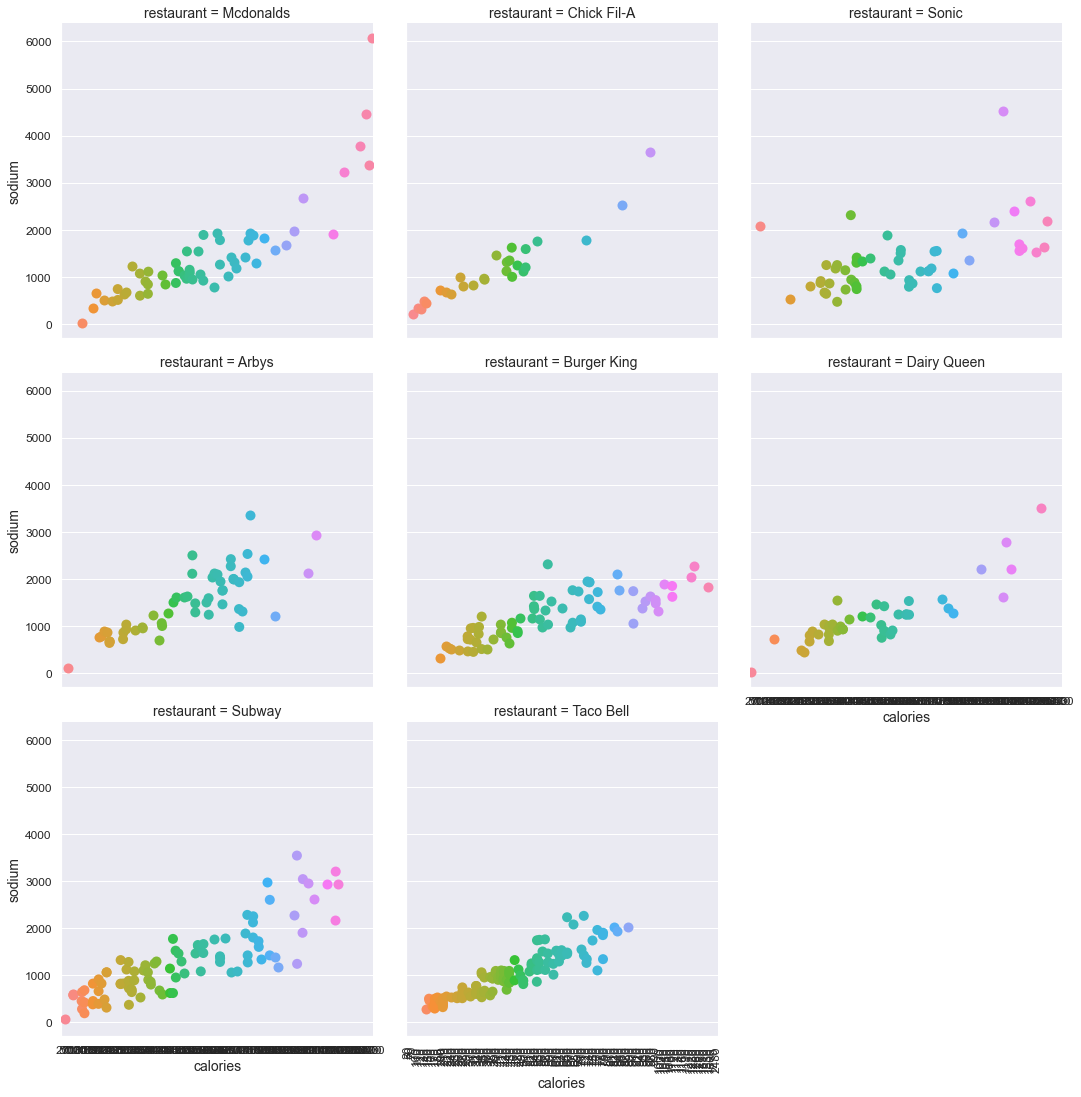

In [17]:
plt.figure(figsize=(40,20))
sns.catplot(x='calories', y = 'sodium', col = 'restaurant', col_wrap=3,
            kind='strip', data=df_calories, height = 5, aspect = 1, s=10)
plt.xticks(rotation=90)
plt.show()

### Problem 4

In [18]:
df_calories.head()

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0


In [19]:
df_calories["is_salad"] = df_calories["item"].str.contains("Salad")

In [20]:
df_calories

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,is_salad
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,False
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,False
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,False
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,False
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,Taco Bell,Spicy Triple Double Crunchwrap,780,340,38,10.0,0.5,50,1850,87,9.0,8,23.0,20.0,10.0,25.0,False
511,Taco Bell,Express Taco Salad w/ Chips,580,260,29,9.0,1.0,60,1270,59,8.0,7,23.0,NaN,NaN,NaN,True
512,Taco Bell,Fiesta Taco Salad-Beef,780,380,42,10.0,1.0,60,1340,74,11.0,7,26.0,NaN,NaN,NaN,True
513,Taco Bell,Fiesta Taco Salad-Chicken,720,320,35,7.0,0.0,70,1260,70,8.0,8,32.0,NaN,NaN,NaN,True


In [21]:
df_calories["is_salad"] = df_calories["is_salad"].astype("int")

In [22]:
df_calories

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,is_salad
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,0
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,0
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,0
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,0
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,Taco Bell,Spicy Triple Double Crunchwrap,780,340,38,10.0,0.5,50,1850,87,9.0,8,23.0,20.0,10.0,25.0,0
511,Taco Bell,Express Taco Salad w/ Chips,580,260,29,9.0,1.0,60,1270,59,8.0,7,23.0,NaN,NaN,NaN,1
512,Taco Bell,Fiesta Taco Salad-Beef,780,380,42,10.0,1.0,60,1340,74,11.0,7,26.0,NaN,NaN,NaN,1
513,Taco Bell,Fiesta Taco Salad-Chicken,720,320,35,7.0,0.0,70,1260,70,8.0,8,32.0,NaN,NaN,NaN,1


<Figure size 1440x1440 with 0 Axes>

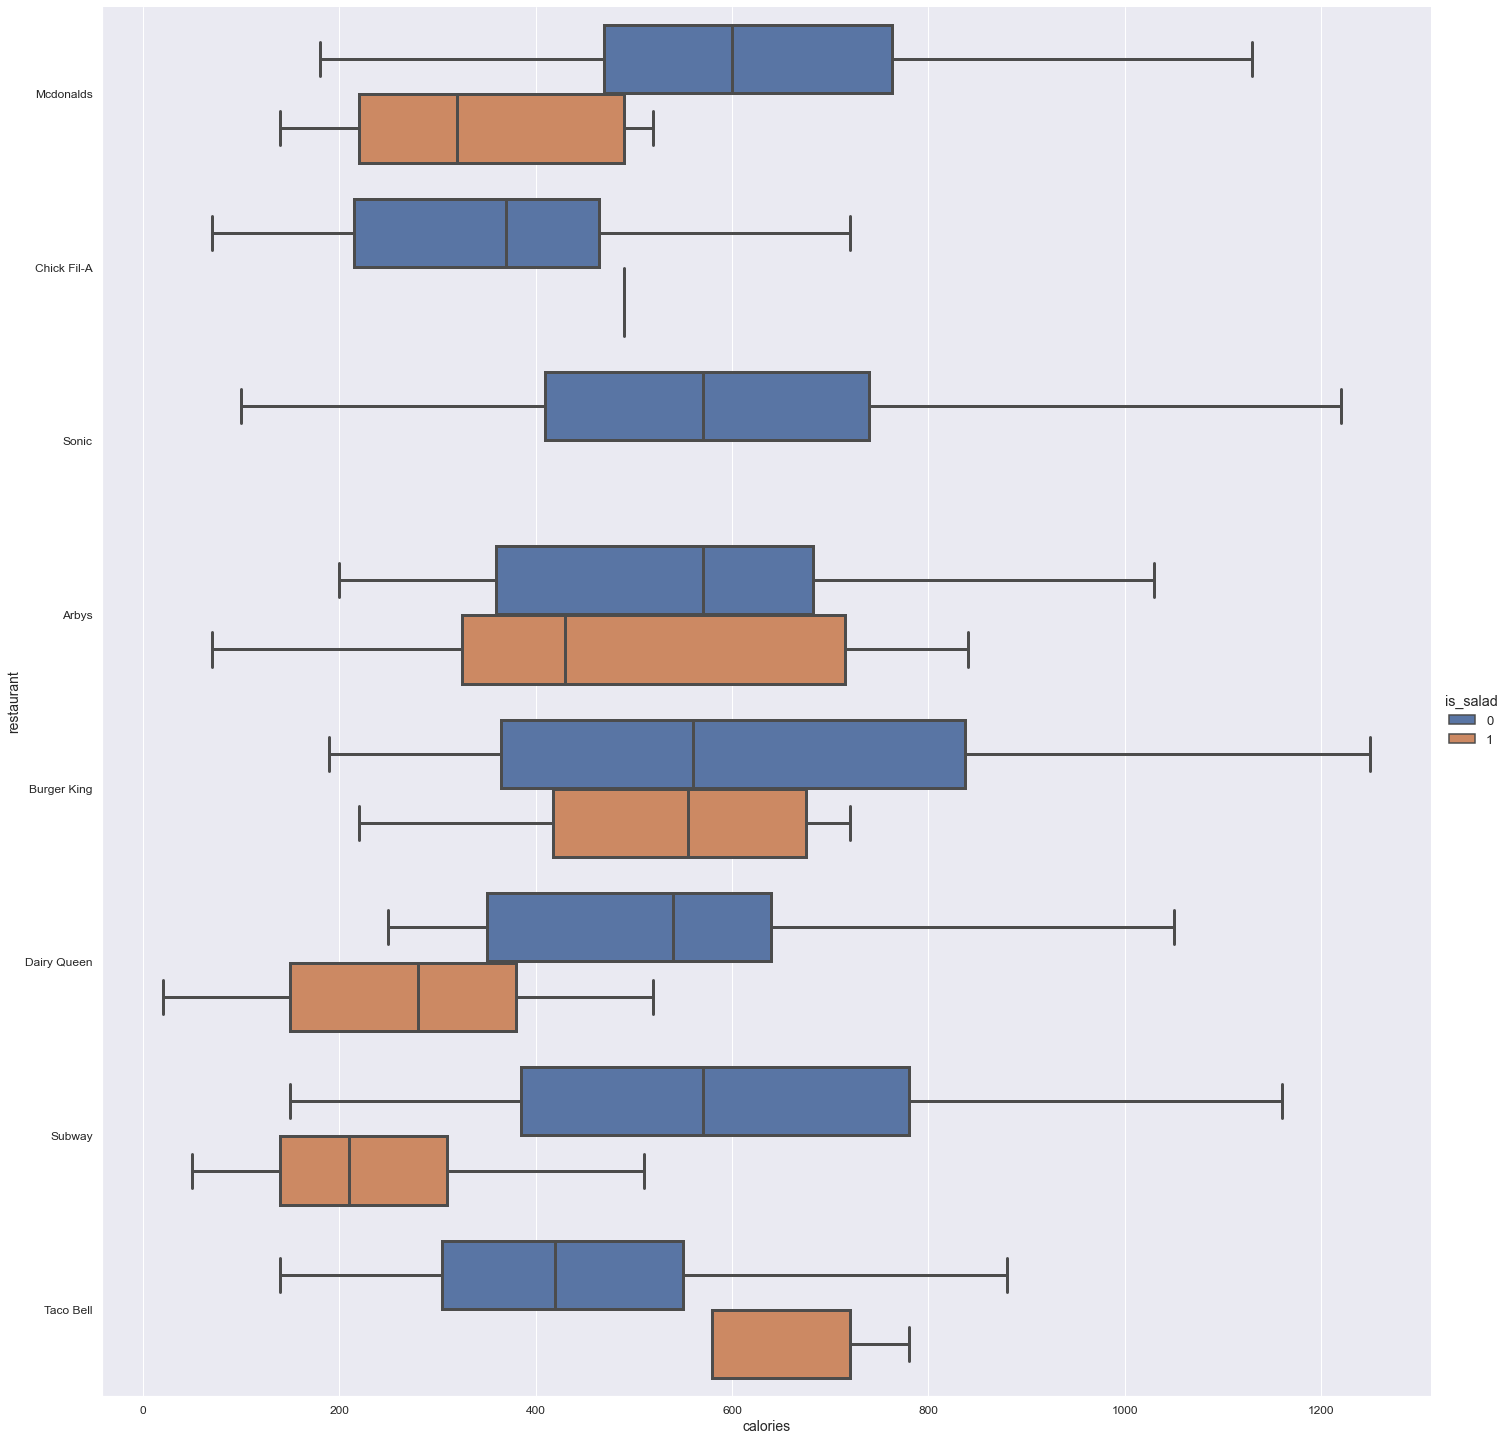

In [23]:
plt.figure(figsize=(20,20))

sns.catplot(x="calories", y="restaurant",

                hue="is_salad", ci=None,

                data=df_calories, color=None, linewidth=3, showfliers = False,

                orient="h", height=20, aspect=1, palette=None,

                kind="box", dodge=True)

plt.show()

### Problem 5

In [24]:
df_calories.head()

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,is_salad
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,0
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,0
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,0
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,0
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,0


In [25]:
df_calories["restaurant"].unique()

array(['Mcdonalds', 'Chick Fil-A', 'Sonic', 'Arbys', 'Burger King',
       'Dairy Queen', 'Subway', 'Taco Bell'], dtype=object)

In [26]:
df_new = df_calories[df_calories["restaurant"] != "Taco Bell"]

In [27]:
df_new["restaurant"].unique()

array(['Mcdonalds', 'Chick Fil-A', 'Sonic', 'Arbys', 'Burger King',
       'Dairy Queen', 'Subway'], dtype=object)

In [28]:
df_new.head()

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,is_salad
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,0
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,0
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,0
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,0
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,0


In [29]:
df_new.groupby(by="restaurant").median()

,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,is_salad
restaurant,,,,,,,,,,,,,,,
Arbys,550.0,250.0,28.0,7.0,0.0,65.0,1480.0,46.0,2.0,6.0,29.0,6.0,10.0,15.0,0
Burger King,555.0,285.0,31.5,8.0,0.0,85.0,1150.0,41.0,2.0,7.5,29.0,NaN,NaN,NaN,0
Chick Fil-A,390.0,126.0,14.0,3.0,0.0,70.0,1000.0,29.0,1.0,4.0,29.0,2.0,8.0,8.0,0
Dairy Queen,485.0,220.0,24.5,9.0,1.0,60.0,1030.0,34.0,2.0,6.0,23.0,10.0,4.0,10.0,0
Mcdonalds,540.0,240.0,27.0,7.0,0.0,95.0,1120.0,46.0,3.0,9.0,33.0,6.0,15.0,15.0,0
Sonic,570.0,290.0,32.0,8.0,0.0,80.0,1250.0,44.0,2.0,7.0,30.0,6.0,6.0,15.0,0
Subway,460.0,137.5,15.0,4.5,0.0,50.0,1130.0,47.0,5.0,8.0,26.0,16.0,40.0,35.0,0


In [30]:
df_sales.head()

,restaurant,average_sales,us_sales,num_company_stores,num_franchised_stores,unit_count
0,Subway,416.86,10800.00,0,25908,25908
1,Mcdonalds,2670.32,37480.67,842,13194,14036
2,Starbucks,945.27,13167.61,8222,5708,13930
3,Dunkin Donuts,733.13,9192.00,0,12538,12538
4,Pizza Hut,900.00,5510.84,96,7426,7522


In [31]:
df_sales["restaurant"].unique()

array(['Subway', 'Mcdonalds', 'Starbucks', 'Dunkin Donuts', 'Pizza Hut',
       'Burger King', 'Taco Bell', 'Wendys', 'Dominos', 'Little Caesars',
       'KFC', 'Sonic', 'Arbys', 'Papa Johns', 'Jimmy Johns',
       'Baskin-Robbins', 'Chipotle', 'Jack in the Box', 'Popeyes'],
      dtype=object)

In [32]:
df_new2 = df_sales[df_sales["restaurant"].str.contains('Arbys') | df_sales["restaurant"].str.contains('Sonic') | \
          df_sales["restaurant"].str.contains('Burger King') | df_sales["restaurant"].str.contains('Subway') | \
          df_sales["restaurant"].str.contains('Mcdonalds')]

In [33]:
df_new2

,restaurant,average_sales,us_sales,num_company_stores,num_franchised_stores,unit_count
0,Subway,416.86,10800.00,0,25908,25908
1,Mcdonalds,2670.32,37480.67,842,13194,14036
5,Burger King,1387.81,10028.32,50,7196,7266
11,Sonic,1250.00,4408.16,228,3365,3593
12,Arbys,1130.00,3634.00,1075,2340,3415


In [34]:
df_new3 = df_new2.sort_values(by="us_sales")
df_new3

,restaurant,average_sales,us_sales,num_company_stores,num_franchised_stores,unit_count
12,Arbys,1130.00,3634.00,1075,2340,3415
11,Sonic,1250.00,4408.16,228,3365,3593
5,Burger King,1387.81,10028.32,50,7196,7266
0,Subway,416.86,10800.00,0,25908,25908
1,Mcdonalds,2670.32,37480.67,842,13194,14036


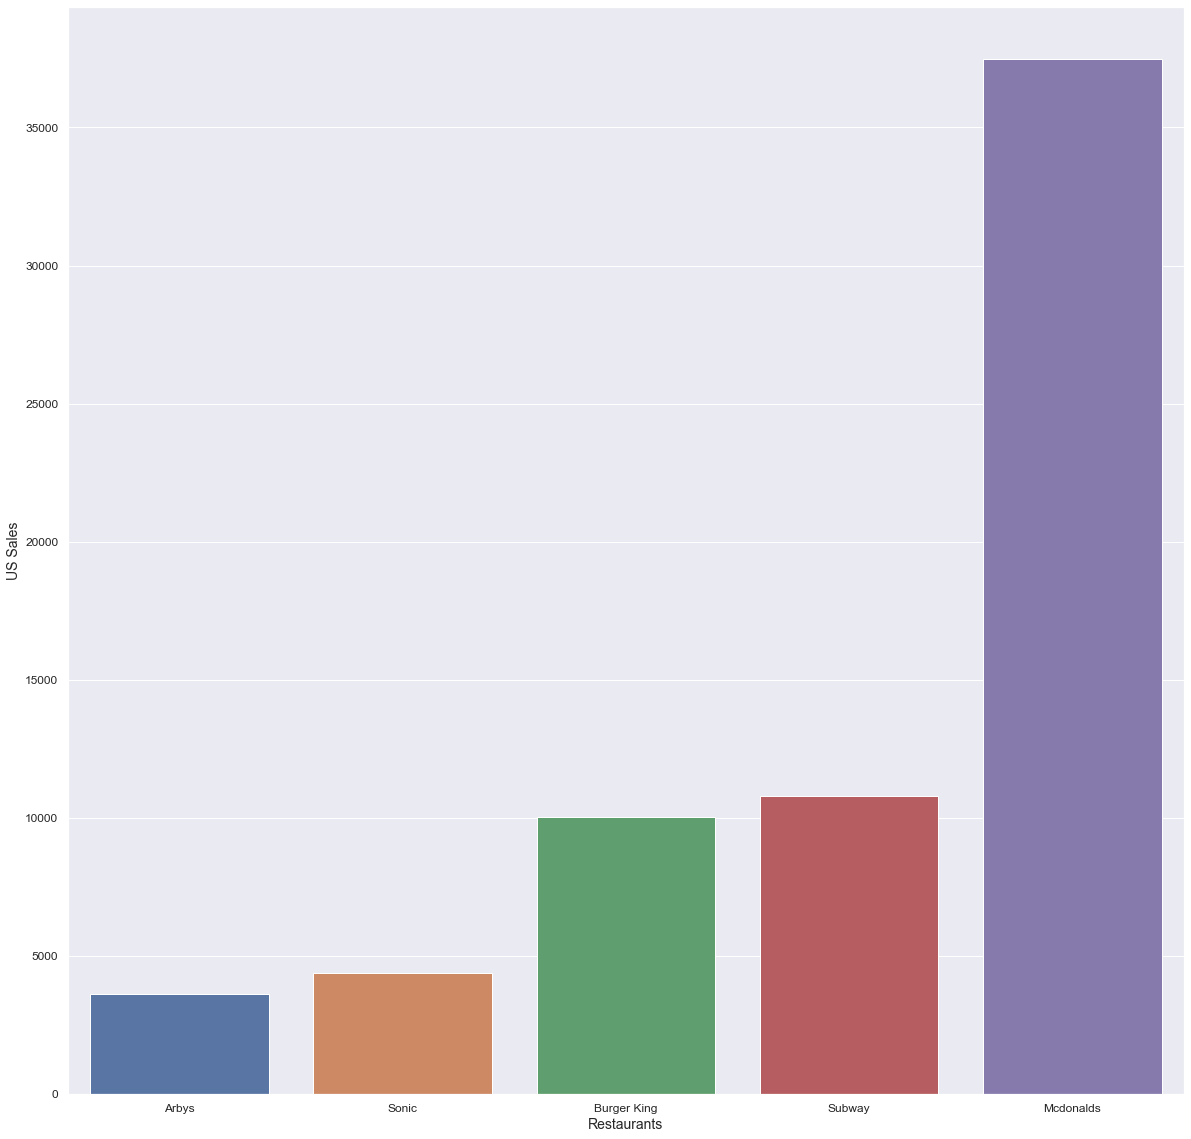

In [35]:
plt.figure(figsize=(20,20))
sns.barplot(x="restaurant", y="us_sales", data=df_new3, ci=None)
plt.xlabel("Restaurants")
plt.ylabel("US Sales")
plt.show()